In [1]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt

In [18]:
def d(x,y):
    return -np.log(np.exp(-(((x-y)**2+(1e-20)**2)**.5))+np.exp(-(180-((x-y)**2+(1e-20)**2)**.5)))

# gaussian function and stimulus function
def gaussian(x, y, sigma): # Gaussian function centered at y
    return np.exp(-np.power(d(x,y), 2.) / (2 * np.power(sigma, 2.)))

def hfunc(x, phi, sigma_FF): # stimulus of orientation phi
    return gaussian(x, phi, sigma_FF)

# threshold quadratic transfer function
def f(k, n, Ialpha):
    return k*(np.power((np.maximum(Ialpha,0)), n))

In [40]:
def two_ring_model(t0, T, dt, phi, N, tau_E, tau_I, J_EE, J_II, J_EI, J_IE, sigma_ori, sigma_FF, k, n, c, a, b):
    # firing rate vectors for ring 1 and ring 2
    r_E1 = np.zeros((N,1))
    r_I1 = np.zeros((N,1))
    r_E2 = np.zeros((N,1))
    r_I2 = np.zeros((N,1))
    
    # matrices to store firing rates as row and time as column
    R_E1 = r_E1
    R_I1 = r_I1
    R_E2 = r_E2
    R_I2 = r_I2 
    
    xs = np.linspace(0, N-1, N)
    
    G_ori = np.fromfunction(lambda x,y: gaussian(x,y,sigma_ori), (N,N)) # Connectivity matrix 
    h = np.array([hfunc(x, phi, sigma_FF) for x in range(N)]) # has shape (180,)
    h = h[:,None] # makes shape (180,1)
    
    W_E1E1 = J_EE*G_ori
    W_E1I1 = -J_EI*G_ori
    W_I1E1 = J_IE*G_ori
    W_I1I1 = -J_II*G_ori
    
    W_E2E2 = J_EE*G_ori
    W_E2I2 = -J_EI*G_ori
    W_I2E2 = J_IE*G_ori
    W_I2I2 = -J_II*G_ori
    
    W_E1E2 = b*W_E2E2
    W_E1I2 = b*W_E2I2
    W_I1E2 = b*W_I2E2
    W_I1I2 = b*W_I2I2
    
    W_E2E1 = a*W_E1E1
    W_E2I1 = a*W_E1I1
    W_I2E1 = a*W_I1E1
    W_I2I1 = a*W_I1I1
    
    I_E1 = c*h + W_E1E1@r_E1 + W_E1I1@r_I1 + W_E1E2@r_E2 + W_E1I2@r_I2
    I_I1 = c*h + W_I1E1@r_E1 + W_I1I1@r_I1 + W_I1E2@r_E2 + W_I1I2@r_I2
    
    I_E2 = c*h + W_E2E1@r_E1 + W_E2I1@r_I1 + W_E2E2@r_E2 + W_E2I2@r_I2
    I_I2 = c*h + W_I2E1@r_E1 + W_I2I1@r_I1 + W_I2E2@r_E2 + W_I2I2@r_I2
    
    M = int(T/dt)
    ts = np.arange(M+1)
    
    for m in range(M):
        #print(m)
        r_E1 += dt*(1/tau_E)*(-r_E1 + f(k,n, I_E1))
        r_I1 += dt*(1/tau_I)*(-r_I1 + f(k,n, I_I1))
        r_E2 += dt*(1/tau_E)*(-r_E2 + f(k,n, I_E2))
        r_I2 += dt*(1/tau_I)*(-r_I2 + f(k,n, I_I2))
        
        I_E1 = c*h + W_E1E1@r_E1 + W_E1I1@r_I1 + W_E1E2@r_E2 + W_E1I2@r_I2
        I_I1 = c*h + W_I1E1@r_E1 + W_I1I1@r_I1 + W_I1E2@r_E2 + W_I1I2@r_I2
        I_E2 = c*h + W_E2E1@r_E1 + W_E2I1@r_I1 + W_E2E2@r_E2 + W_E2I2@r_I2
        I_I2 = c*h + W_I2E1@r_E1 + W_I2I1@r_I1 + W_I2E2@r_E2 + W_I2I2@r_I2
        
        R_E1 = np.c_[R_E1, r_E1]
        R_I1 = np.c_[R_I1, r_I1]
        R_E2 = np.c_[R_E2, r_E2]
        R_I2 = np.c_[R_I2, r_I2]
        
    return r_E1, r_I1, r_E2, r_I2, R_E1, R_I1, R_E2, R_I2, xs, ts, c, h

In [57]:
r_E1, r_I1, r_E2, r_I2, R_E1, R_I1, R_E2, R_I2, xs, ts, c, h = two_ring_model(t0=0, T=500, dt=0.1, phi=45, N=180, tau_E=20, tau_I=10, J_EE=0.044, J_II=0.018, J_EI=0.023, J_IE=0.042, sigma_ori=32, sigma_FF=30, k=0.04, n=2.0, c=40, a=.1, b=.5)


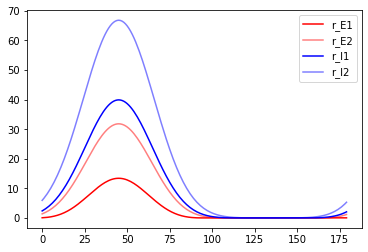

In [56]:
plt.plot(r_E1, label='r_E1', color='r', alpha=1)
plt.plot(r_E2, label='r_E2', color='r', alpha=.5)
plt.plot(r_I1, label='r_I1', color='b', alpha=1)
plt.plot(r_I2, label='r_I2', color='b', alpha=.5)
plt.legend()
plt.show()

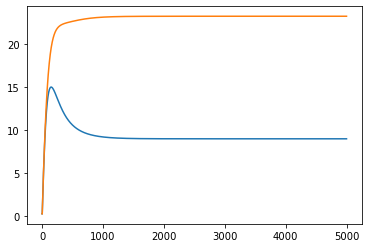

In [49]:
plt.plot(R_E1[30,:])
plt.plot(R_E2[30,:])
plt.show()